画像処理についていろいろしてみる  
参考http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/index.html

In [158]:
import cv2, matplotlib
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array, array_to_img
from PIL import Image, ImageDraw, ImageFont

In [159]:
size_x = 1024
size_y = 1024

# 元画像

In [160]:
#この5枚について確認していく
img_list=[]
img_list.append(load_img(r"C:\Users\nomura\Documents\data\train\train_0.jpg",target_size=(size_x,size_y)))
img_list.append(load_img(r"C:\Users\nomura\Documents\data\train\train_1.jpg",target_size=(size_x,size_y)))
img_list.append(load_img(r"C:\Users\nomura\Documents\data\train\train_2.jpg",target_size=(size_x,size_y)))
img_list.append(load_img(r"C:\Users\nomura\Documents\data\train\train_3.jpg",target_size=(size_x,size_y)))
img_list.append(load_img(r"C:\Users\nomura\Documents\data\train\train_4.jpg",target_size=(size_x,size_y)))

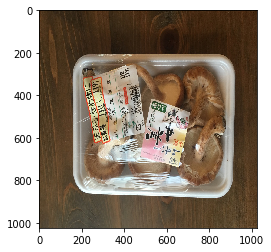

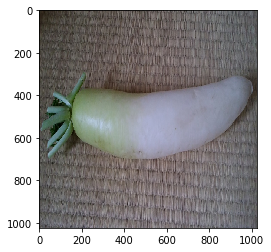

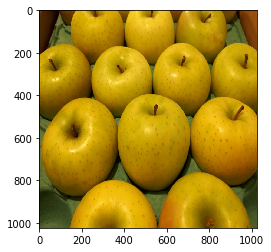

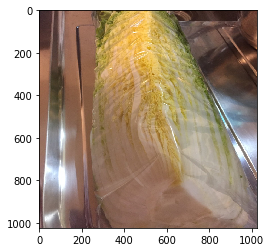

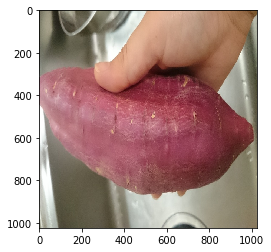

In [171]:
for img in img_list:
    plt.imshow(img)
    plt.show()

In [204]:
#kerasのimage_to_arrayはデータ型がfloat32になって,opencvとmatplotlibとの互換で問題がある.（unit8に変換しなければいけない,または値を0~1になるようスケーリングする）
#floatは0~1で解釈され，uinitは0~255で解釈される
RGB_array_list = []
for img in img_list:
    RGB_array_list.append(np.array(img))
RGB_array_list[0].shape

(1024, 1024, 3)

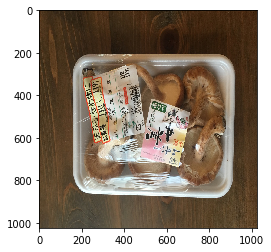

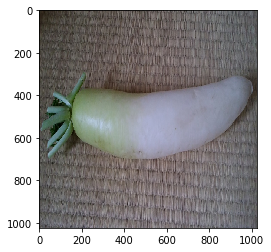

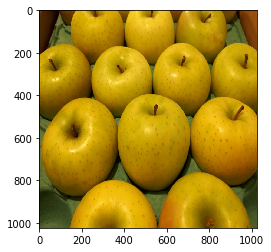

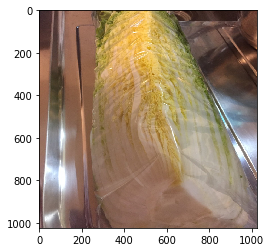

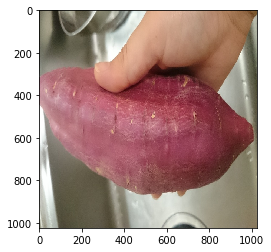

In [206]:
for RGB in RGB_array_list:
    plt.imshow(RGB)
    plt.show()

In [207]:
#BGRにする
def to_opencv_format(array):
    return cv2.cvtColor(array, cv2.COLOR_RGB2BGR)

In [208]:
#opencvはBGRを期待しているので変換
BGR_array_list = []
for img in img_list:
    BGR_array_list.append(to_opencv_format(np.array(img))) 
BGR_array_list[0].shape

(1024, 1024, 3)

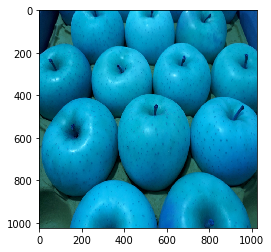

In [209]:
#matplotlibはRGBを期待しているので以下のようになる
for BGR_array in BGR_array_list:
    plt.imshow(BGR_array)
    plt.show()

# 拡大

In [292]:
#中央に拡大
closeup_list = []
closeup_array_list=[]
trim1 = (int(size_x/4),int(size_y/4))
trim2 = (int(size_x-size_x/4),int(size_y-size_y/4))

for RGB_array in RGB_array_list:
    closeup_array = RGB_array[trim1[0]:trim2[0], trim1[1]:trim2[1]]
    closeup_array_list.append(closeup_array)


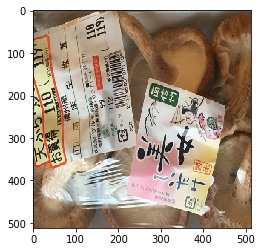

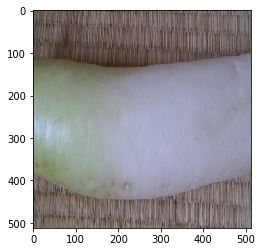

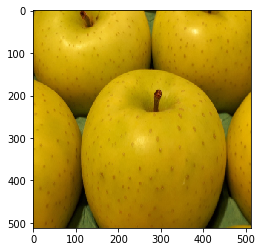

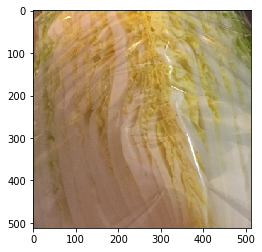

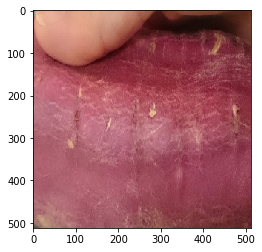

In [293]:
for closeup_array in closeup_array_list:
    plt.imshow(closeup_array)
    plt.show()

# グレイスケール

In [210]:
gray_list = []
gray_array_list = []
for array in BGR_array_list:
    gray_array = np.reshape(cv2.cvtColor(array, cv2.COLOR_BGR2GRAY),(size_x,size_y,1))
    gray_array_list.append(gray_array)
    gray = array_to_img(gray_array)
    gray_list.append(gray)


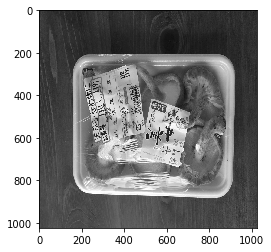

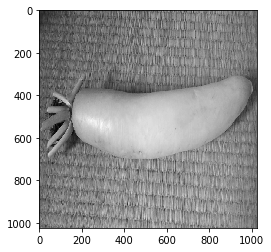

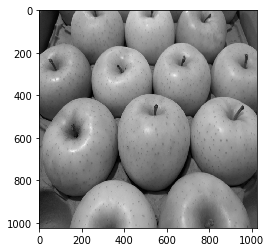

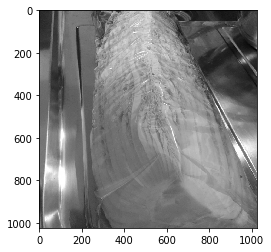

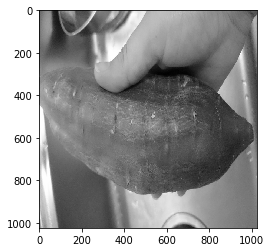

In [211]:
for gray in gray_list:
    plt.imshow(np.reshape(gray,(size_x,size_y)),'gray')
    plt.show()


# 鉛筆画っぽくするhttp://www.mathgram.xyz/entry/cv/contour

In [212]:
def make_contour_image(image):
    neiborhood24 = np.array([[1, 1, 1, 1, 1],
                             [1, 1, 1, 1, 1],
                             [1, 1, 1, 1, 1],
                             [1, 1, 1, 1, 1],
                             [1, 1, 1, 1, 1]],
                             np.uint8)
    # グレースケールで画像を読み込む.
    gray = image
    cv2.imwrite("gray.jpg", gray)

    # 白い部分を膨張させる.
    dilated = cv2.dilate(gray, neiborhood24, iterations=1)
    cv2.imwrite("dilated.jpg", dilated)

    # 差をとる.
    diff = cv2.absdiff(dilated, gray)
    cv2.imwrite("diff.jpg", diff)

    # 白黒反転
    contour = 255 - diff
    cv2.imwrite("./output.jpg", contour)
    return contour

In [213]:
contour_array_list = []
contour_list = []
for gray_array in gray_array_list:
    contour_array = np.reshape(make_contour_image(gray_array),(size_x,size_y,1))
    contour_array_list.append(contour_array)
    contour = array_to_img(np.reshape(make_contour_image(gray_array),(1024,1024,1)))
    contour_list.append(contour)

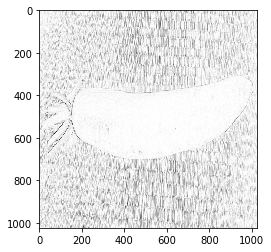

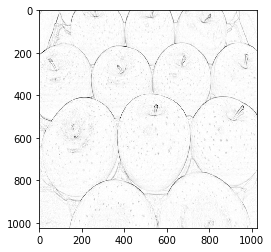

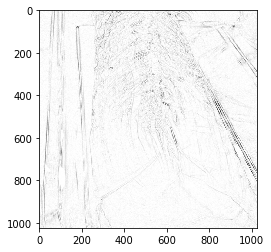

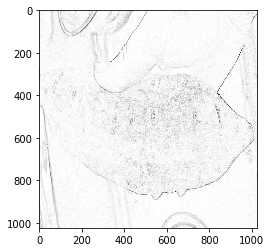

In [214]:
for contour in contour_list:
    plt.imshow(np.reshape(contour,(size_x,size_y)),'gray')
    plt.show()


# 二値画像にしてみる

In [226]:
binary_array_list = []
binary_list = []
th = 127
for gray_array in gray_array_list:
    _,binary_array = cv2.threshold(gray_array,th,255,cv2.THRESH_BINARY)
    binary_array_list.append(binary_array)
    binary = array_to_img(np.reshape(binary_array,(size_x,size_y,1)))
    binary_list.append(binary)
    

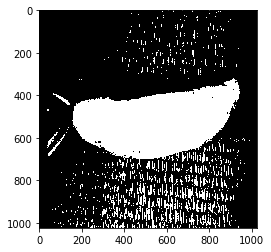

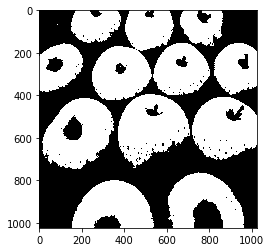

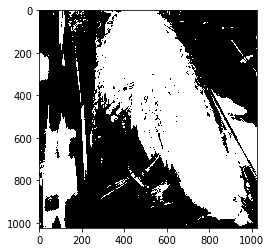

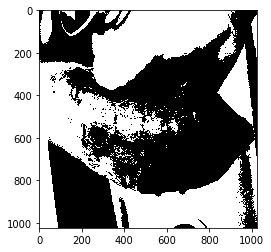

In [228]:
for binary_array in binary_array_list:
    plt.imshow(np.reshape(binary_array,(size_x,size_y)),'gray')
    plt.show()

# エッジ検出

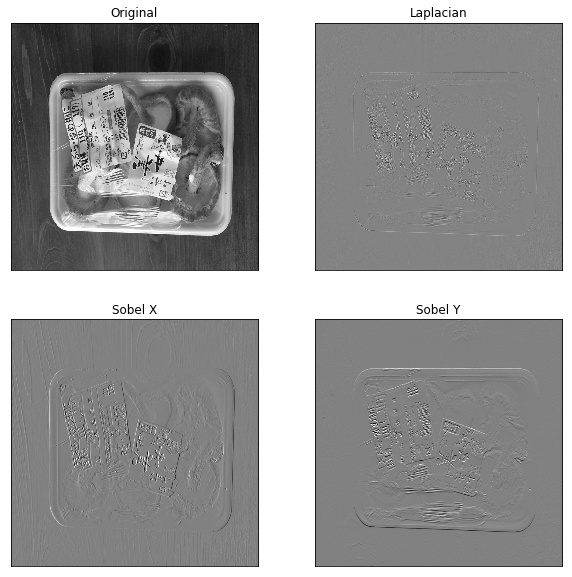

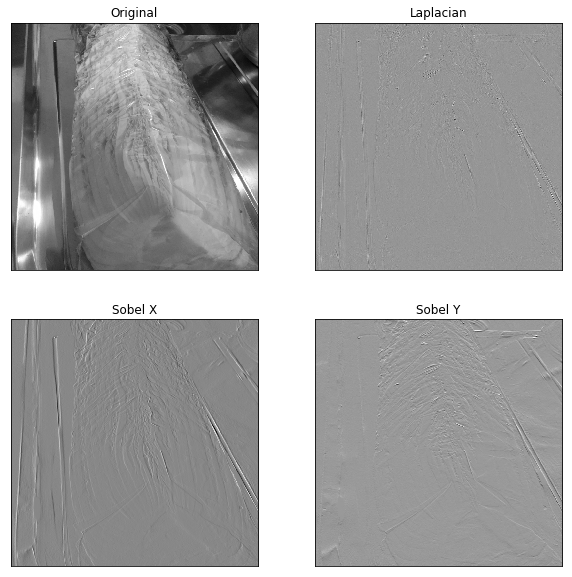

In [271]:
laplacian_array_list = []
sobelx_array_list = []
sobely_array_list = []

for gray_array in gray_array_list:
    
    img = gray_array
    
    laplacian = cv2.Laplacian(img,cv2.CV_64F)
    sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
    sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
    
    laplacian_array_list.append(laplacian)
    sobelx_array_list.append(sobelx)
    sobely_array_list.append(sobely)
    
    plt.figure(figsize=(10, 10))

    plt.subplot(2,2,1)
    plt.imshow(np.reshape(img,(size_x,size_y)),cmap = 'gray')
    plt.title('Original')
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(2,2,2)
    plt.imshow(np.reshape(laplacian,(size_x,size_y)),cmap = 'gray')
    plt.title('Laplacian')
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(2,2,3),plt.imshow(np.reshape(sobelx,(size_x,size_y)),cmap = 'gray')
    plt.title('Sobel X')
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(2,2,4)
    plt.imshow(np.reshape(sobely,(size_x,size_y)),cmap = 'gray')
    plt.title('Sobel Y')
    plt.xticks([])
    plt.yticks([])

    plt.show()

# 色情報のヒストグラムを描く